# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

%matplotlib inline

In [19]:
# Carregando dados de treinamento
X_train = pd.read_csv('X_train.csv', index_col=['Unnamed: 0', 'subject_train'])


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7352 entries, (0, 1) to (7351, 30)
Columns: 561 entries, 1 tBodyAcc-mean()-X to 561 angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.8 MB


In [25]:
y_train = (pd.read_csv('y_train.txt', header=None).squeeze('columns'))

In [27]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7352 entries, 0 to 7351
Series name: 0
Non-Null Count  Dtype
--------------  -----
7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB


In [33]:
X_test = pd.read_csv('X_test.csv', index_col=['Unnamed: 0', 'subject_test'])

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2947 entries, (0, 2) to (2946, 24)
Columns: 561 entries, 1 tBodyAcc-mean()-X to 561 angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.7 MB


In [35]:
y_test = (pd.read_csv('y_test.txt', header=None).squeeze('columns'))

In [39]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2947 entries, 0 to 2946
Series name: 0
Non-Null Count  Dtype
--------------  -----
2947 non-null   int64
dtypes: int64(1)
memory usage: 23.2 KB


---------------

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train, 
                                                      test_size=0.25, 
                                                      random_state=42)

In [43]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_train: (5514, 561)
y_train: (5514,)


In [45]:
print('X_valid:', X_valid.shape)
print('y_valid:', y_valid.shape)

X_valid: (1838, 561)
y_valid: (1838,)


In [47]:
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_test: (2947, 561)
y_test: (2947,)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [49]:
%%time
clf = DecisionTreeClassifier(max_depth=4, 
                             random_state=42).fit(X=X_train, 
                                                  y=y_train)


CPU times: total: 1.98 s
Wall time: 2.01 s


In [51]:
%%time
three_best_vars = (pd.DataFrame(data={'var': X_train.columns, 
                                      'feature_importances_': clf.feature_importances_})
                     .sort_values(by='feature_importances_', 
                                  ascending=False))

CPU times: total: 31.2 ms
Wall time: 3.83 ms


In [53]:
%%time
print(three_best_vars)

                                     var  feature_importances_
52                53 tGravityAcc-min()-X              0.285303
389  390 fBodyAccJerk-bandsEnergy()-1,16              0.254091
41               42 tGravityAcc-mean()-Y              0.164608
214             215 tGravityAccMag-std()              0.140142
69          70 tGravityAcc-arCoeff()-Y,1              0.122278
..                                   ...                   ...
184        185 tBodyGyroJerk-entropy()-Z              0.000000
183        184 tBodyGyroJerk-entropy()-Y              0.000000
182        183 tBodyGyroJerk-entropy()-X              0.000000
181            182 tBodyGyroJerk-iqr()-Z              0.000000
560             561 angle(Z,gravityMean)              0.000000

[561 rows x 2 columns]
CPU times: total: 0 ns
Wall time: 4.04 ms


In [59]:
cols = three_best_vars['var'].values[:3]
print('As 3 melhores variáveis são:', cols)

As 3 melhores variáveis são: ['53 tGravityAcc-min()-X' '390 fBodyAccJerk-bandsEnergy()-1,16'
 '42 tGravityAcc-mean()-Y']


In [63]:
%%time
X_train[cols].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5514 entries, (6593, 28) to (7270, 30)
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   53 tGravityAcc-min()-X               5514 non-null   float64
 1   390 fBodyAccJerk-bandsEnergy()-1,16  5514 non-null   float64
 2   42 tGravityAcc-mean()-Y              5514 non-null   float64
dtypes: float64(3)
memory usage: 461.6 KB
CPU times: total: 15.6 ms
Wall time: 10.4 ms


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [65]:
%%time
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X=X_train[cols], 
                                                                            y=y_train)

CPU times: total: 78.1 ms
Wall time: 49.1 ms


In [67]:
%%time
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: total: 0 ns
Wall time: 1.27 ms


In [69]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, 
                                 ccp_alpha=ccp_alpha).fit(X=X_train[cols], 
                                                          y=y_train)
    clfs.append(clf)

train_scores = [clf.score(X=X_train[cols], y=y_train) for clf in clfs]
valid_scores = [clf.score(X=X_valid[cols], y=y_valid) for clf in clfs]

CPU times: total: 9.53 s
Wall time: 9.58 s


In [110]:
%%time
fig, ax = plt.subplots()
ax.set_xlabel(xlabel='Alpha')
ax.set_ylabel(ylabel='Acurácia')
ax.set_title(label='Acurácia  x  Alpha do conjunto de dados de treino e validação')

ax.plot(ccp_alphas, train_scores, marker='o', label='Treino', color='black', linestyle='--')

ax.plot(ccp_alphas, valid_scores, marker='o', label='Validação', color='red', linestyle='-')

ax.legend()

CPU times: total: 31.2 ms
Wall time: 26 ms


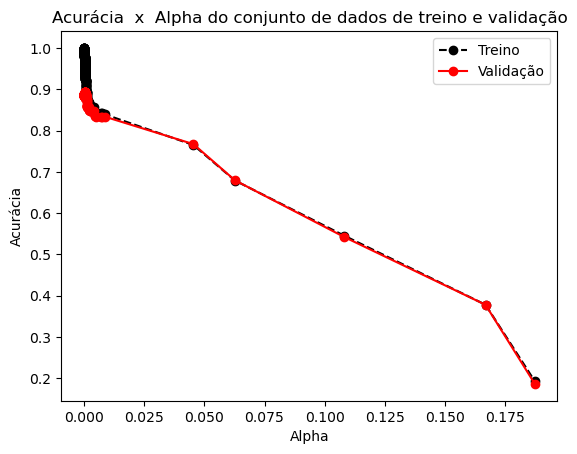

CPU times: total: 203 ms
Wall time: 209 ms


In [112]:
%%time
plt.show()

In [75]:
%%time
best_tree_index = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
best_tree = clfs[best_tree_index]

CPU times: total: 0 ns
Wall time: 0 ns


In [77]:
print(f'A acurácia da melhor árvore na base de validação é de: {valid_scores[best_tree_index] * 100:.2f}')


A acurácia da melhor árvore na base de validação é de: 89.45


In [79]:
best_tree

DecisionTreeClassifier(ccp_alpha=0.0002845570582240876, random_state=42)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [98]:
%%time
accuracy_test = best_tree.score(X=X_test[cols], 
                                y=y_test)

CPU times: total: 0 ns
Wall time: 6.18 ms


In [104]:
%%time
print(f'A acurácia da melhor árvore na base de testes é de: {accuracy_test * 100:.2f}')

A acurácia da melhor árvore na base de testes é de: 68.51
CPU times: total: 0 ns
Wall time: 1 ms


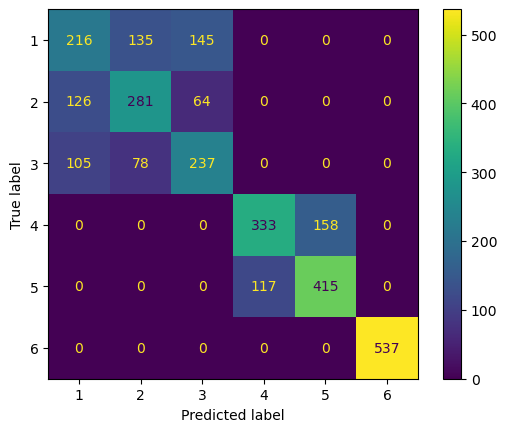

CPU times: total: 281 ms
Wall time: 275 ms


In [102]:
%%time
ConfusionMatrixDisplay.from_estimator(estimator=best_tree, 
                                      X=X_test[cols], 
                                      y=y_test);
plt.show()

------------------------------------------